<a href="https://colab.research.google.com/github/haewon1219/aerial-cactus-detect/blob/main/%ED%95%AD%EA%B3%B5%EC%82%AC%EC%A7%84_%EB%82%B4_%EC%84%A0%EC%9D%B8%EC%9E%A5_%EC%8B%9D%EB%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 항공 사진 내 선인상 식별##
✅ 경진대회 목적: 항공 사진 내 보호구역에서 선인장 식별하고, 선인장이 얼마나 있는지 파악하기.

✅ 캐글 사이트: https://www.kaggle.com/c/aerial-cactus-identification

✅ 유형 및 평가지표: 이진분류, ROC, AUC

✅ 딥러닝 모델: CNN, 합성곱, 풀링, 평탄화, 전결합, 배치 정규화, Leaky Relu, Relu.

In [9]:
import pandas as pd
from google.colab import files

In [13]:
# 파일 읽기
labels = pd.read_csv("train.csv")
submission = pd.read_csv("sample_submission.csv")

# 데이터 확인
print(labels.head())
print(submission.head())

                                     id  has_cactus
0  0004be2cfeaba1c0361d39e2b000257b.jpg           1
1  000c8a36845c0208e833c79c1bffedd1.jpg           1
2  000d1e9a533f62e55c289303b072733d.jpg           1
3  0011485b40695e9138e92d0b3fb55128.jpg           1
4  0014d7a11e90b62848904c1418fc8cf2.jpg           1
                                     id  has_cactus
0  000940378805c44108d287872b2f04ce.jpg         0.5
1  0017242f54ececa4512b4d7937d1e21e.jpg         0.5
2  001ee6d8564003107853118ab87df407.jpg         0.5
3  002e175c3c1e060769475f52182583d0.jpg         0.5
4  0036e44a7e8f7218e9bc7bf8137e4943.jpg         0.5


In [14]:
labels.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


id는 이미지파일 (확장자 포함)

In [15]:
submission.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


([<matplotlib.patches.Wedge at 0x7be871fed2d0>,
 [Text(-0.7793519565739234, 0.7762799287527649, 'Has cactus'),
  Text(0.7793519929142085, -0.776279892268666, "Hasn't cactus")],
 [Text(-0.42510106722213997, 0.42342541568332626, '75.1%'),
  Text(0.4251010870441137, -0.42342539578290866, '24.9%')])

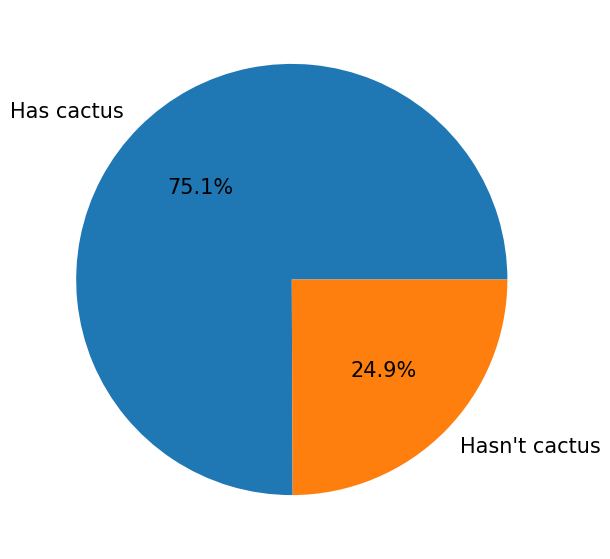

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size = 15)
plt.figure(figsize=(7,7))

label = ['Has cactus', 'Hasn\'t cactus']
plt.pie(labels['has_cactus'].value_counts(), labels=label, autopct='%.1f%%')

데이터는 파일명과 타깃값이 있다. 타깃값을 이용하여 그래프를 그렸다. 타깃값이 얼마나 불균형한지 알아보고, 실제 이미지가 어떻게 생겼는지 한번 살펴보기 위해 그려보았다.

In [19]:
from zipfile import ZipFile

with ZipFile('train.zip') as zipper:
  zipper.extractall()

In [21]:
with ZipFile('test.zip') as zipper:
  zipper.extractall()

In [22]:
import os

num_train = len(os.listdir('train/'))
num_test = len(os.listdir('test/'))

print(f'Number of train images: {num_train}')
print(f'Number of test images: {num_test}')

Number of train images: 17500
Number of test images: 4000


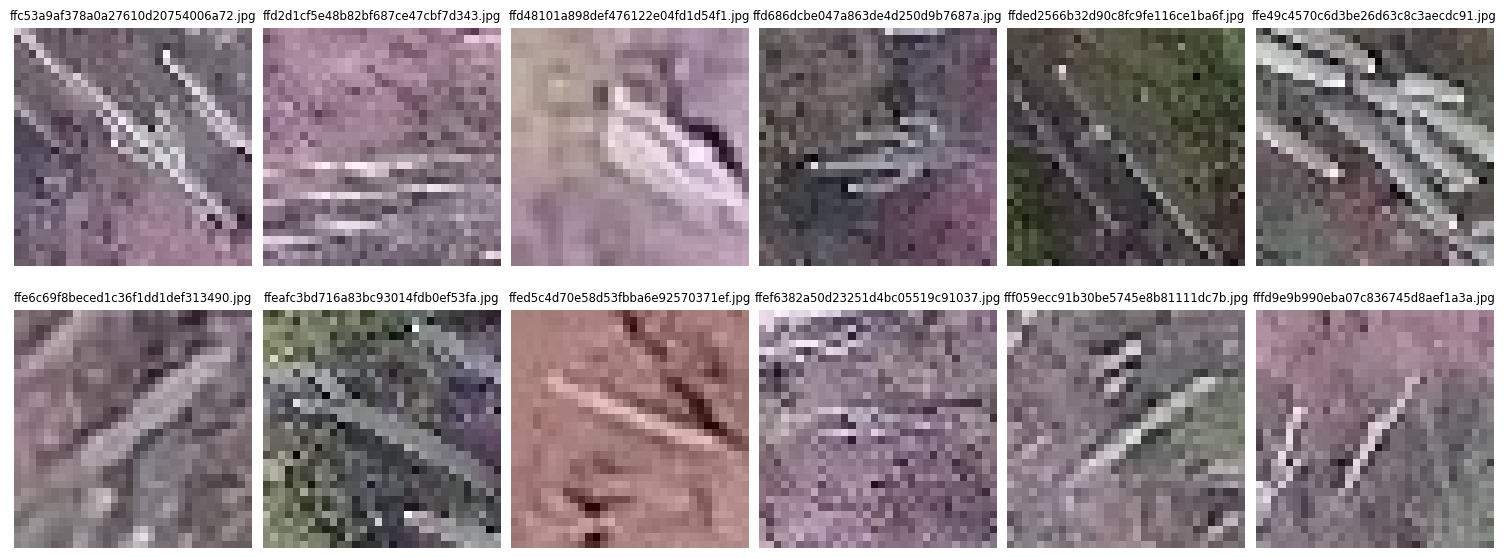

In [28]:
import matplotlib.gridspec as gridspec
import cv2

# Colab 환경에 맞는 설정
mpl.rc('font', size=7)
plt.figure(figsize=(15, 6))
grid = gridspec.GridSpec(2, 6)

# Colab 작업 디렉토리에서 train 폴더 확인
train_dir = '/content/train/'  # Colab에 업로드한 폴더 경로를 정확히 지정

# 마지막 12개의 has_cactus 이미지 ID 가져오기
# 'labels'는 데이터프레임이어야 합니다.
last_has_cactus_img_name = labels[labels['has_cactus'] == 1]['id'].tail(12)

for idx, img_name in enumerate(last_has_cactus_img_name):
    img_path = os.path.join(train_dir, img_name)  # 경로 결합
    if os.path.exists(img_path):  # 파일이 존재하는지 확인
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
        ax = plt.subplot(grid[idx])
        ax.imshow(image)
        ax.axis('off')  # 축 제거
        ax.set_title(img_name)
    else:
        print(f"Image not found: {img_path}")  # 파일이 없을 때 메시지 출력

plt.tight_layout()
plt.show()

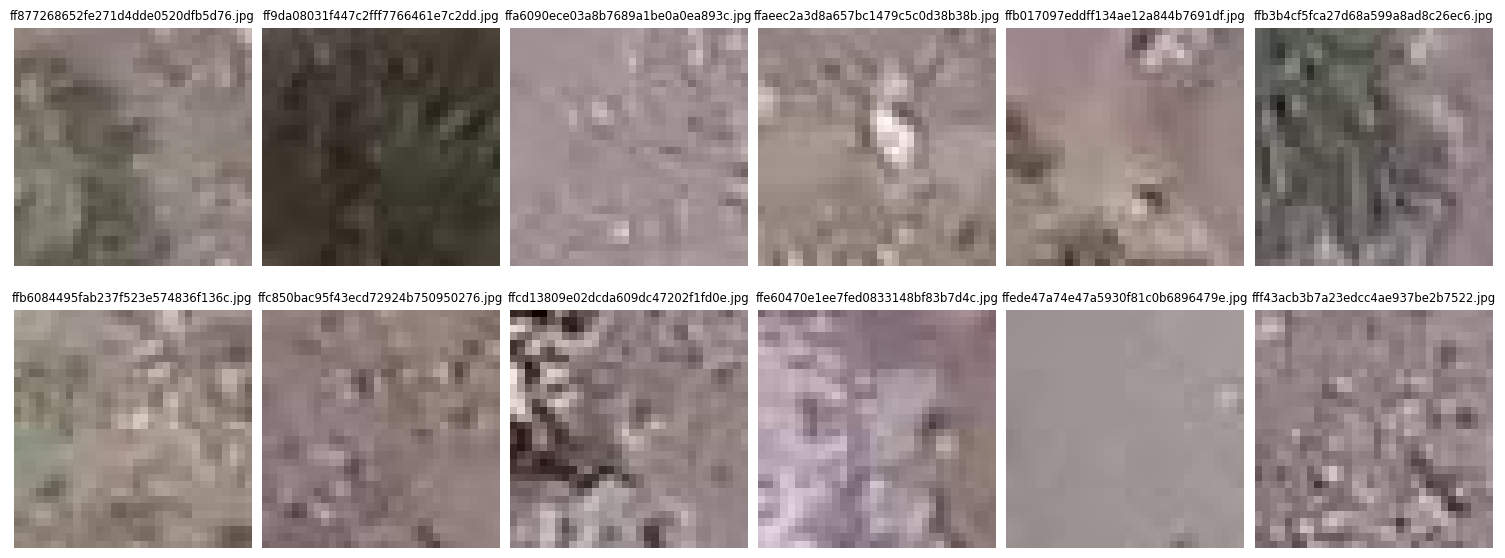

In [30]:
# Figure 설정
plt.figure(figsize=(15, 6))  # `figsize` 잘못된 이름 수정
grid = gridspec.GridSpec(2, 6)

# 마지막 12개의 hasnt_cactus 이미지 ID 가져오기
last_hasnt_cactus_img_name = labels[labels['has_cactus'] == 0]['id'].tail(12)  # `[-12:]` 대신 `tail(12)`

# 루프 구문 수정
for idx, img_name in enumerate(last_hasnt_cactus_img_name):
    img_path = os.path.join('train', img_name)  # 경로 결합
    if os.path.exists(img_path):  # 파일 존재 여부 확인
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 잘못된 `cv2.cvtColot` 수정
        ax = plt.subplot(grid[idx])
        ax.imshow(image)
        ax.axis('off')  # 축 제거
        ax.set_title(img_name)
    else:
        print(f"Image not found: {img_path}")  # 파일이 없을 때 메시지 출력

plt.tight_layout()
plt.show()

In [31]:
image.shape

(32, 32, 3)

베이스라인 모델

In [33]:
import torch
import random
import numpy as np
import os

seed = 50
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = True

In [34]:
if torch.cuda.is_available():
  device = torch.device('cuda')

else:
  device = torch.device('cpu')

In [35]:
device

device(type='cpu')

In [36]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cpu')

In [37]:
import pandas as pd

data_path = '/content/train.csv'

labels = pd.read_csv(data_path)
submission = pd.read_csv('/content/sample_submission.csv')

In [38]:
from zipfile import ZipFile

with ZipFile('train.zip') as zipper:
  zipper.extractall()

with ZipFile('test.zip') as zipper:
  zipper.extractall()

In [39]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(labels,
                                    test_size=0.1,
                                    stratify=labels['has_cactus'],
                                    random_state=42)

In [41]:
print('훈련 데이터 개수', len(train_df))
print('검증 데이터 개수', len(val_df))

훈련 데이터 개수 15750
검증 데이터 개수 1750


In [42]:
import cv2
from torch.utils.data import Dataset

In [45]:
import os
import cv2
from torch.utils.data import Dataset

class ImageDataset(Dataset):
    def __init__(self, df, img_dir='./', transform=None):
        """
        Args:
            df (DataFrame): 데이터프레임, 첫 번째 열은 이미지 ID, 두 번째 열은 라벨.
            img_dir (str): 이미지가 저장된 디렉토리 경로.
            transform (callable, optional): 이미지를 변환하기 위한 함수/객체.
        """
        self.df = df
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # 이미지 ID 및 경로 생성
        img_id = self.df.iloc[idx, 0]  # 첫 번째 열이 이미지 ID
        img_path = os.path.join(self.img_dir, img_id)  # 경로 결합

        # 이미지 로드 및 BGR->RGB 변환
        if os.path.exists(img_path):  # 파일 존재 여부 확인
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        else:
            raise FileNotFoundError(f"Image not found: {img_path}")

        # 레이블 가져오기
        label = self.df.iloc[idx, 1]  # 두 번째 열이 라벨

        # 이미지 변환 적용
        if self.transform is not None:
            image = self.transform(image)

        return image, label

In [46]:
from torchvision import transforms

transform = transforms.ToTensor()

In [47]:
dataset_train = ImageDataset(train_df, img_dir='./train', transform=transform)
dataset_val = ImageDataset(val_df, img_dir='./train', transform=transform)

In [49]:
from torch.utils.data import DataLoader

dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=False)

모델 생성

In [50]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Model(nn.Module):
  def __init__(self)
    super(Model, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2)
